# Geospatial Analysis with GeoPandas: A Comprehensive Tutorial

**Welcome!** This notebook will guide you through the fundamentals of geospatial analysis using GeoPandas, a powerful Python library that extends the datatypes used by [pandas](https://pandas.pydata.org/) to allow spatial operations on geometric types.

**Learning Objectives:**
1.  Understand what GeoPandas is and why it's useful.
2.  Learn about core GeoPandas data structures: `GeoSeries` and `GeoDataFrame`.
3.  Read and write various geospatial file formats.
4.  Understand and work with Coordinate Reference Systems (CRS).
5.  Perform basic geometric operations.
6.  Visualize geospatial data.
7.  Conduct attribute and spatial joins.
8.  Perform overlay analysis.
9.  Create thematic maps (choropleth maps).

## 1. Introduction to GeoPandas

### 1.1 What is GeoPandas?
GeoPandas is an open-source project designed to make working with geospatial data in Python easier. It combines the power of pandas (for data manipulation) with Shapely (for geometric operations) and Fiona (for file access), and uses Matplotlib for plotting.

Key features:
*   Familiar `DataFrame` and `Series` structures (`GeoDataFrame`, `GeoSeries`).
*   Ability to read and write various geospatial file formats (Shapefile, GeoJSON, GeoPackage, etc.).
*   Geometric operations (e.g., buffer, intersection, union).
*   Coordinate Reference System (CRS) management.
*   Plotting capabilities.

### 1.2 Installation (Recap)
If you haven't already, install GeoPandas and its dependencies. Open your terminal or Anaconda Prompt and run:

```bash
# Using pip
pip install geopandas matplotlib mapclassify

# Or using conda (recommended for easier dependency management)
conda install geopandas matplotlib mapclassify -c conda-forge
```

### 1.3 Importing GeoPandas
Let's start by importing GeoPandas, typically aliased as `gpd`, and other useful libraries.

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# To make plots appear inline in Jupyter
%matplotlib inline

print(f"GeoPandas version: {gpd.__version__}")

GeoPandas version: 1.1.0


---

## 2. Core Data Structures: GeoSeries and GeoDataFrame

GeoPandas has two main data structures:

*   **`GeoSeries`**: A vector of geometries (like a pandas Series, but holds `shapely.geometry` objects).
*   **`GeoDataFrame`**: A tabular data structure (like a pandas DataFrame), but with a special `GeoSeries` column named "geometry". This geometry column defines the spatial component of the `GeoDataFrame`.

### 2.1 GeoSeries
A `GeoSeries` can contain any type of geometry (points, lines, polygons).

In [40]:
from shapely.geometry import Point, Polygon, LineString

# Create a GeoSeries with different geometry types
s = gpd.GeoSeries([
    Point(0, 0),
    Point(1, 1),
    LineString([(0, 0), (1, 1)]),
    Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
])

print(type(s))
print(s)

<class 'geopandas.geoseries.GeoSeries'>
0                            POINT (0 0)
1                            POINT (1 1)
2                  LINESTRING (0 0, 1 1)
3    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
dtype: geometry


You can access individual geometries:

In [41]:
print(s[0]) # First geometry: Point(0, 0)
print(s.geom_type) # Type of each geometry

POINT (0 0)
0         Point
1         Point
2    LineString
3       Polygon
dtype: object


### 2.2 GeoDataFrame
A `GeoDataFrame` is the workhorse of GeoPandas. It stores geometries along with their attributes.

In [42]:
# Create a GeoDataFrame
# We need a geometry column (a GeoSeries) and other attribute columns
data = {
    'id': [1, 2, 3],
    'name': ['City A', 'City B', 'Park C'],
    'geometry': [Point(1, 2), Point(3, 4), Polygon([(0,0), (0,1), (1,1), (1,0)])]
}
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326") # We'll discuss CRS soon

print(type(gdf))
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry
0,1,City A,POINT (1 2)
1,2,City B,POINT (3 4)
2,3,Park C,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))"


Notice the `geometry` column. This is what makes it a `GeoDataFrame`.
You can check which column is the active geometry column:

In [43]:
print(gdf.geometry.name)

geometry


And access it directly:

In [44]:
print(gdf.geometry)

0                            POINT (1 2)
1                            POINT (3 4)
2    POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))
Name: geometry, dtype: geometry


---

## 3. Reading and Writing Geospatial Data

GeoPandas can read and write many common vector-based spatial data formats using the `fiona` library. Common formats include:
*   Shapefile (`.shp`)
*   GeoJSON (`.geojson`, `.json`)
*   GeoPackage (`.gpkg`)
*   KML, GML, etc.

### 3.1 Reading Data
GeoPandas comes with some built-in datasets for demonstration. Let's load one: `naturalearth_lowres`, which contains country boundaries.

In [45]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df2 = gpd.read_file(url)

In [46]:
df2

,scalerank,featureclass,geometry
0,1,Country,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,1,Country,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,1,Country,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,1,Country,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,1,Country,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,1,Country,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,1,Country,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,1,Country,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,1,Country,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


In [47]:
import geopandas as gpd
import geodatasets

# path_to_data = geodatasets.get_path('naturalearth_lowres')
world = gpd.read_file("../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")


print(f"Type of 'world': {type(world)}")
world.head()

Type of 'world': <class 'geopandas.geodataframe.GeoDataFrame'>


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


Let's inspect the `GeoDataFrame`:

In [48]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


You can see columns like `pop_est` (population estimate), `continent`, `name`, `iso_a3`, and importantly, `geometry`.

### 3.2 Basic Plotting
GeoPandas makes it very easy to create a quick map.

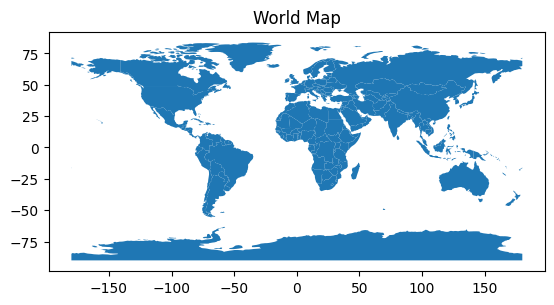

In [50]:
world.plot()
plt.title("World Map")
plt.show()

This simple plot uses the `geometry` column. We can also plot based on an attribute:

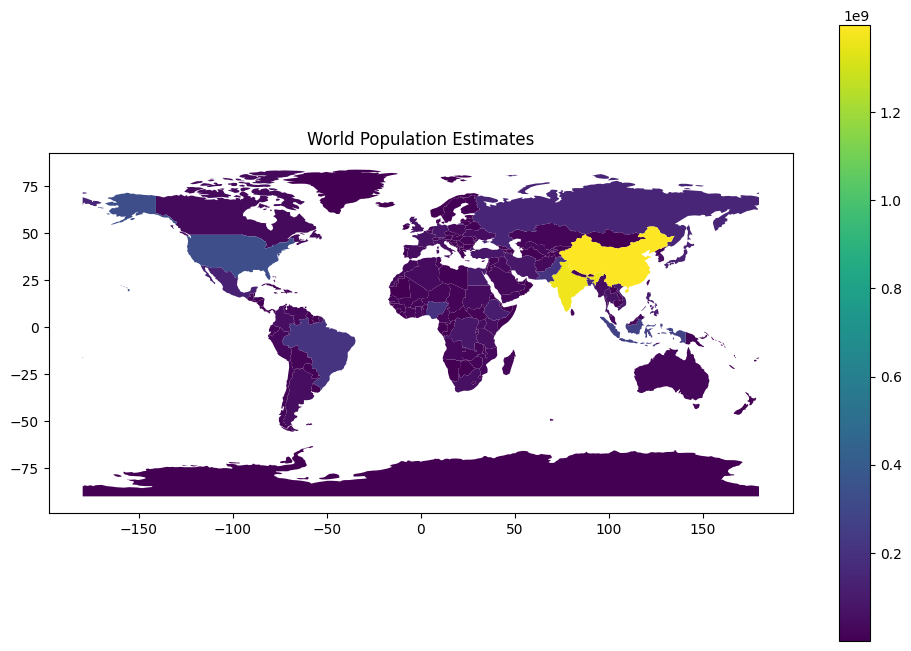

In [51]:
world.plot(column='POP_EST', legend=True, figsize=(12, 8))
plt.title("World Population Estimates")
plt.show()

### 3.3 Writing Data
You can save your `GeoDataFrame` to various formats.

In [52]:
# Let's select a subset of data to save
africa = world[world['CONTINENT'] == 'Africa']

# Save to Shapefile (common, but has limitations like long column names)
africa.to_file("africa.shp") # This will create africa.shp, .dbf, .shx, .cpg files

# Save to GeoJSON (good for web, single file)
africa.to_file("africa.geojson", driver="GeoJSON")

# Save to GeoPackage (modern, SQLite-based, single file, recommended)
africa.to_file("africa.gpkg", driver="GPKG")

print("Data subset 'africa' created. Uncomment to_file lines to save.")
africa.head()

d:\git_projects\taxi_demand_forecasting\.venv\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 200963599 of field POP_EST of feature 17 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\git_projects\taxi_demand_forecasting\.venv\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 100388073 of field POP_EST of feature 43 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
d:\git_projects\taxi_demand_forecasting\.venv\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 112078730 of field POP_EST of feature 45 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(


Data subset 'africa' created. Uncomment to_file lines to save.


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,1,Democratic Republic of the Congo,...,None,None,None,None,None,None,None,None,None,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2..."
12,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,1,Somalia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
13,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,1,Kenya,...,None,None,None,None,None,None,None,None,None,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."


---

## 4. Coordinate Reference Systems (CRS)

A Coordinate Reference System (CRS) defines how the geographic coordinates of your data relate to actual locations on Earth. It's crucial for accurate spatial analysis and mapping.

### 4.1 Understanding CRS
*   **Geographic CRS (e.g., WGS84, EPSG:4326):** Uses latitude and longitude on a spherical or ellipsoidal model of the Earth. Units are typically degrees.
*   **Projected CRS (e.g., UTM zones, Web Mercator EPSG:3857):** Projects the Earth's surface onto a 2D plane. Units are typically meters or feet. Projections distort shape, area, distance, or direction.

### 4.2 Checking the CRS
The CRS information is stored in the `.crs` attribute of a `GeoDataFrame` or `GeoSeries`.

In [53]:
print(f"CRS of 'world' GeoDataFrame: {world.crs}")

CRS of 'world' GeoDataFrame: EPSG:4326


`EPSG:4326` is the code for WGS84, a very common geographic CRS.

### 4.3 Setting a CRS
If you load data that doesn't have CRS information but you know what it is, you can set it.
**Important:** This does *not* change the coordinates; it only defines what they mean.

In [113]:
# Example: imagine gdf_no_crs was loaded without CRS info
gdf_no_crs = gpd.GeoDataFrame({'id': [1], 'geometry': [Point(0,0)]}) # Example without CRS
print(f"Initial CRS: {gdf_no_crs.crs}")
gdf_no_crs.crs = "EPSG:4326" # or gdf_no_crs.set_crs("EPSG:4326", inplace=True)
print(f"Set CRS: {gdf_no_crs.crs}")
print("CRS setting example commented out as 'gdf_no_crs' is not defined here.")

Initial CRS: None
Set CRS: EPSG:4326
CRS setting example commented out as 'gdf_no_crs' is not defined here.


### 4.4 Reprojecting Data
To change the CRS of your data (e.g., from geographic to projected), use the `to_crs()` method. This actually transforms the coordinate values.

In [55]:
# Let's reproject the world data to Web Mercator (EPSG:3857), commonly used for web maps
world_mercator = world.to_crs(epsg=3857) # or .to_crs("EPSG:3857")

print(f"CRS of 'world_mercator': {world_mercator.crs}")
world_mercator.head() # Notice the geometry coordinates have changed

CRS of 'world_mercator': EPSG:3857


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((20037508.343 -1812498.413, 200..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((3774143.866 -105758.362, 3792946.708..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-964649.018 3205725.605, -964597.245..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-13674486.249 6274861.394, -13..."


Let's plot both to see the difference:

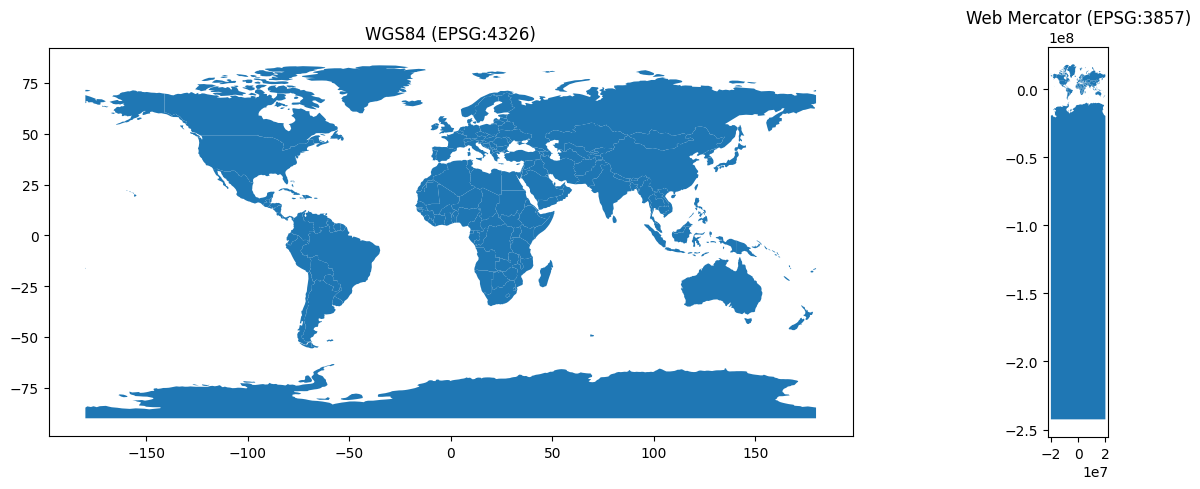

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

world.plot(ax=ax1)
ax1.set_title("WGS84 (EPSG:4326)")

world_mercator.plot(ax=ax2)
ax2.set_title("Web Mercator (EPSG:3857)")

plt.tight_layout()
plt.show()

Notice the shape distortion, especially near the poles, in the Mercator projection.

**Why reproject?**
*   To ensure all layers in an analysis share the same CRS.
*   To use a projection suitable for specific measurements (e.g., equal-area projections for area calculations).
*   For compatibility with certain tools or basemaps.

---

## 5. Basic Geometric Operations

GeoPandas `GeoSeries` (and thus the `geometry` column of a `GeoDataFrame`) provide many methods for geometric operations, leveraging Shapely.

### 5.1 Accessing Geometry Properties
*   `.area`: Calculates the area of polygons. **Note:** Area units depend on the CRS. For EPSG:4326 (degrees), area is in square degrees, which is not very meaningful. For projected CRS (meters), area is in square meters.
*   `.length`: Calculates the length of lines. Units also depend on the CRS.
*   `.bounds`: Returns the bounding box (minx, miny, maxx, maxy) for each geometry.
*   `.geom_type`: Returns the type of each geometry (Point, LineString, Polygon).
*   `.centroid`: Returns the geometric center of each geometry.

In [57]:
# Calculate area (meaningful if in a projected CRS)
# Let's use an equal-area projection for more accurate area calculations
# World Eckert IV (EPSG:54012 is a common one, or use an ESRI string if preferred)
# For instance, ESRI:54030 is World_Eckert_IV
world_ea = world.to_crs("ESRI:54030") 
world_ea['area_sqkm'] = world_ea.area / 1_000_000 # Area in square kilometers

world_ea.sort_values(by='area_sqkm', ascending=False)[['NAME', 'area_sqkm']].head()

,NAME,area_sqkm
159,Antarctica,2.364331e+07
18,Russia,2.079279e+07
3,Canada,1.213047e+07
4,United States of America,9.690725e+06
139,China,8.939493e+06


C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\2249750028.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.centroid


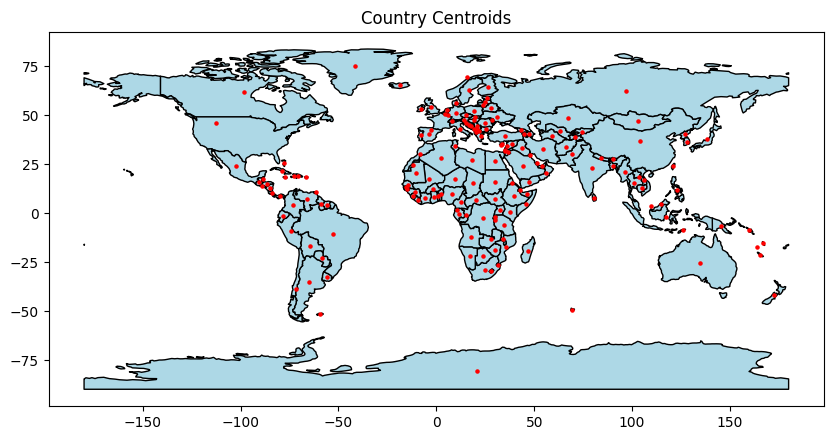

In [58]:
# Get centroids of countries
world['centroid'] = world.centroid

# Plot countries and their centroids
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
world.plot(ax=ax, edgecolor='black', color='lightblue')
world['centroid'].plot(ax=ax, color='red', markersize=5)
ax.set_title("Country Centroids")
plt.show()

*Self-correction: The centroids above are stored in a new column named `centroid` which is a `GeoSeries`. It's not changing the active geometry column.*

In [59]:
# Bounding box
print("Bounds of the first 5 countries (minx, miny, maxx, maxy):")
print(world.bounds.head())

Bounds of the first 5 countries (minx, miny, maxx, maxy):
         minx       miny        maxx       maxy
0 -180.000000 -18.287990  180.000000 -16.020882
1   29.339998 -11.720938   40.316590  -0.950000
2  -17.063423  20.999752   -8.665124  27.656426
3 -140.997780  41.675105  -52.648099  83.233240
4 -171.791111  18.916190  -66.964660  71.357764


### 5.2 Creating Buffers
A buffer is a polygon created by extending a geometry outward by a specified distance.
**Important:** Buffering distance units depend on the CRS. For meaningful distances (like meters or km), reproject to a suitable projected CRS first.

In [60]:
!pip install geodatasets




[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# Let's take a look at cities data
cities = gpd.read_file("../data/ne_110m_admin_0_countries/ne_50m_populated_places.shp")

cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,None,...,None,None,None,None,None,None,None,None,None,POINT (32.5333 0.5833)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,None,...,None,None,None,None,None,None,None,None,None,POINT (30.275 0.671)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,None,...,None,None,None,None,None,None,None,None,None,POINT (15.799 40.642)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,None,...,None,None,None,None,None,None,None,None,None,POINT (14.656 41.563)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,None,...,None,None,None,None,None,None,None,None,None,POINT (7.315 45.737)


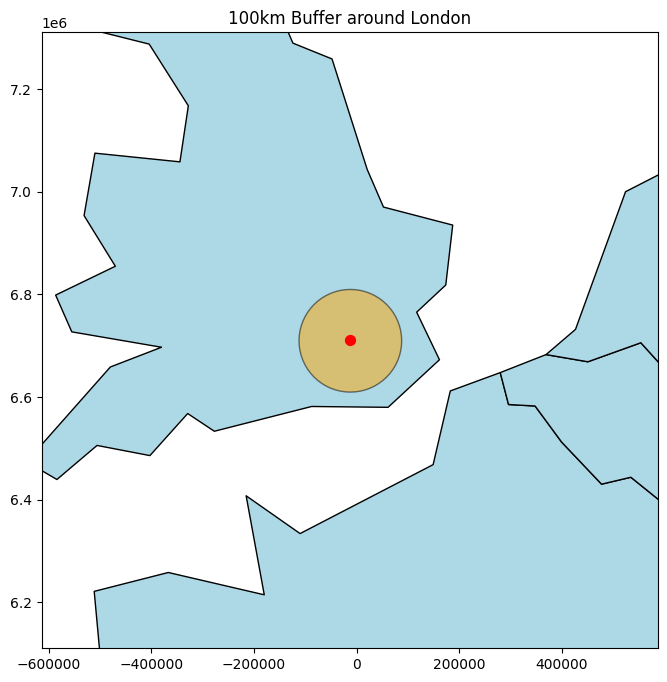

In [67]:
# Project cities to a CRS with meter units (e.g., UTM zone or a world projection like Mercator)
# For simplicity, let's use Web Mercator (EPSG:3857)
cities_mercator = cities.to_crs(epsg=3857)

# Create a 100 km buffer around each city
# 100 km = 100,000 meters
cities_mercator['buffer_geom'] = cities_mercator.geometry.buffer(100000) # 100km buffer

# Plot (focus on a region for clarity)
# Let's plot London and its buffer
london = cities_mercator[cities_mercator['NAME'] == 'London']
london_buffer_geom = london['buffer_geom'] # This is a GeoSeries

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Create a GeoDataFrame for the buffer to plot easily if it's a single geometry, or plot GeoSeries directly
london_buffer_geom.plot(ax=ax, alpha=0.5, color='orange', edgecolor='black')
london.plot(ax=ax, color='red', markersize=50)
ax.set_title("100km Buffer around London")

# For context, add some nearby countries (reprojected)
# Note: this can be slow for the whole world. We'll limit to Europe.
europe_mercator = world_mercator[world_mercator['CONTINENT'] == 'Europe']
europe_mercator.plot(ax=ax, edgecolor='black', color='lightblue', zorder=-1) # zorder to plot below

# Set plot limits to zoom in
if not london_buffer_geom.empty:
    minx, miny, maxx, maxy = london_buffer_geom.total_bounds
    ax.set_xlim(minx - 500000, maxx + 500000)
    ax.set_ylim(miny - 500000, maxy + 500000)
else:
    print("London buffer is empty, cannot set plot limits based on it.")

plt.show()

### 5.3 Other Operations
*   `.simplify()`: Simplifies geometries (e.g., reduces vertices in lines/polygons).
*   `.convex_hull`: Returns the smallest convex polygon containing each geometry.
*   `.unary_union`: Dissolves multiple geometries into a single geometry.

C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\1772755505.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  africa_polygon = africa.unary_union # This returns a single Shapely geometry


<class 'shapely.geometry.multipolygon.MultiPolygon'>


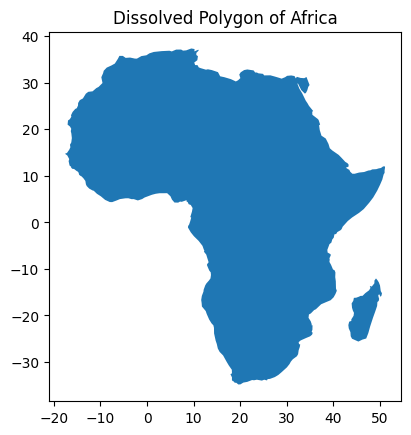

In [68]:
# Example: Dissolve all countries in Africa into a single polygon
africa_polygon = africa.unary_union # This returns a single Shapely geometry
print(type(africa_polygon))

# To plot it easily, convert to a GeoSeries/GeoDataFrame
gpd.GeoSeries([africa_polygon], crs=africa.crs).plot()
plt.title("Dissolved Polygon of Africa")
plt.show()

---

## 6. Attribute Operations (like Pandas)

Since a `GeoDataFrame` is essentially a pandas `DataFrame`, you can use all the familiar pandas operations for attribute data.

### 6.1 Selecting Columns

In [71]:
world_subset = world[['NAME', 'CONTINENT', 'POP_EST', 'geometry']]
world_subset.head()

,NAME,CONTINENT,POP_EST,geometry
0,Fiji,Oceania,889953.0,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Tanzania,Africa,58005463.0,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,W. Sahara,Africa,603253.0,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,North America,37589262.0,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,United States of America,North America,328239523.0,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


### 6.2 Filtering Rows (Querying)

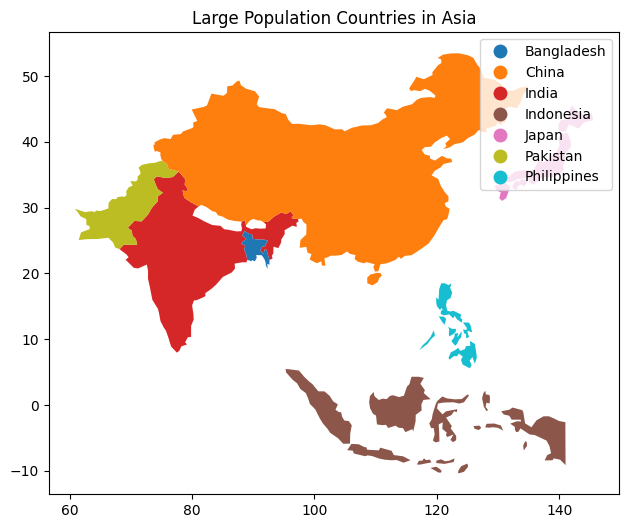

            NAME       POP_EST
8      Indonesia  2.706256e+08
98         India  1.366418e+09
99    Bangladesh  1.630462e+08
102     Pakistan  2.165653e+08
139        China  1.397715e+09
147  Philippines  1.081166e+08
155        Japan  1.262649e+08


In [72]:
# Countries in Asia with population > 100 million
asia_large_pop = world[(world['CONTINENT'] == 'Asia') & (world['POP_EST'] > 100_000_000)]
asia_large_pop.plot(column='NAME', legend=True, figsize=(10,6))
plt.title("Large Population Countries in Asia")
plt.show()
print(asia_large_pop[['NAME', 'POP_EST']])

### 6.3 Calculating New Columns

In [ ]:
# world['pop_density'] = world['POP_EST'] / (world_ea['area_sqkm']) # Using area from equal-area projection
# world.sort_values(by='pop_density', ascending=False)[['name', 'pop_density', 'POP_EST', 'continent']].head(10)
# *Note: We aligned world_ea['area_sqkm'] with world based on index. It's safer to merge or join if indices might not align.*

# For robust calculation:
# Merge world (geographic CRS, original attributes) with world_ea (projected, with area_sqkm)
# Ensure they have a common key, e.g., 'iso_a3' or 'name'
world_with_area = world.merge(world_ea[['NAME', 'area_sqkm']], on='NAME', how='left')

# Calculate population density
# Handle potential division by zero or NaN areas if any country has zero/NaN area
world_with_area['pop_density'] = 0.0 # Initialize
valid_area_mask = (world_with_area['area_sqkm'] > 0) & (world_with_area['area_sqkm'].notna())
world_with_area.loc[valid_area_mask, 'pop_density'] = world_with_area['POP_EST'] / world_with_area['area_sqkm']

world_with_area.sort_values(by='pop_density', ascending=False)[['NAME', 'pop_density', 'POP_EST', 'CONTINENT']].head(10)

,NAME,pop_density,POP_EST,CONTINENT
99,Bangladesh,1395.733781,1.630462e+08,Asia
79,Palestine,1011.790015,4.685306e+06,Asia
140,Taiwan,786.644840,2.356838e+07,Asia
77,Lebanon,728.282442,6.855713e+06,Asia
169,Rwanda,658.108388,1.262695e+07,Africa
96,South Korea,549.882508,5.170910e+07,Asia
75,Burundi,534.704734,1.153058e+07,Africa
98,India,498.765916,1.366418e+09,Asia
16,Haiti,462.897955,1.126308e+07,North America
147,Philippines,443.536405,1.081166e+08,Asia


---

## 7. Spatial Joins

Spatial joins combine two `GeoDataFrames` based on the spatial relationship between their geometries. This is analogous to attribute joins (merges) in pandas, but instead of joining on a common column, we join on geometric predicates.

Key function: `gpd.sjoin()`

Common spatial predicates (`op` argument in `sjoin`):
*   `intersects`: Geometries touch or overlap in any way.
*   `contains`: Join geometry completely contains the other.
*   `within`: Join geometry is completely within the other.

Let's find which cities are within which countries.

In [75]:
# Ensure both GeoDataFrames have the same CRS!
# 'world' is EPSG:4326, 'cities' is also EPSG:4326 by default from naturalearth_cities
print(f"World CRS: {world.crs}")
print(f"Cities CRS: {cities.crs}")

# If they were different, we'd reproject one:
# cities = cities.to_crs(world.crs)

# Perform the spatial join
# We want to add country information to each city
# 'left_df' is cities, 'right_df' is world
# 'how='inner'' means only keep cities that fall within a country
# 'predicate='within'' is the more modern way to specify 'op' (though 'op' still works)
cities_with_country_info = gpd.sjoin(cities, world[['NAME', 'CONTINENT', 'ISO_A3', 'geometry']], how="inner", predicate="within")

# Rename columns to avoid confusion if 'name' exists in both
cities_with_country_info.rename(columns={'name_left': 'city_name', 'name_right': 'country_name'}, inplace=True)

cities_with_country_info.head()

World CRS: EPSG:4326
Cities CRS: EPSG:4326


,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME_left,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,...,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,index_right,NAME_right,CONTINENT,ISO_A3
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,None,...,None,None,None,None,None,POINT (32.5333 0.5833),168,Uganda,Africa,UGA
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,None,...,None,None,None,None,None,POINT (30.275 0.671),168,Uganda,Africa,UGA
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,None,...,None,None,None,None,None,POINT (15.799 40.642),141,Italy,Europe,ITA
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,None,...,None,None,None,None,None,POINT (14.656 41.563),141,Italy,Europe,ITA
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,None,...,None,None,None,None,None,POINT (7.315 45.737),141,Italy,Europe,ITA


Notice the new columns from the `world` GeoDataFrame (e.g., `index_right`, `continent`, `pop_est` of the country). `index_right` refers to the index of the matching row in the `world` DataFrame.

CONTINENT
Asia             335
Europe           209
Africa           202
North America    196
South America    117
Oceania           47
Antarctica        11
Name: count, dtype: int64


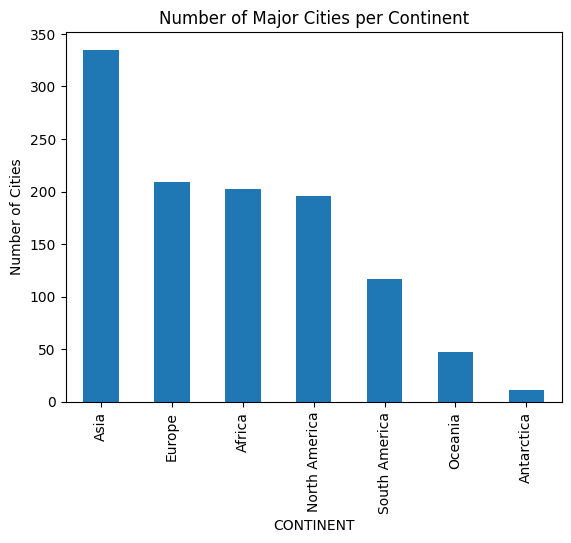

In [77]:
# How many cities in each continent?
cities_per_continent = cities_with_country_info['CONTINENT'].value_counts()
print(cities_per_continent)

cities_per_continent.plot(kind='bar')
plt.title("Number of Major Cities per Continent")
plt.ylabel("Number of Cities")
plt.show()

---

## 8. Overlay Analysis

Overlay operations combine two `GeoDataFrames` based on their geometries, resulting in a new `GeoDataFrame` where geometries are combinations (e.g., intersection, union) of the original ones.

Key function: `gpd.overlay()`

Types of overlay (`how` argument):
*   `intersection`: Keeps only the overlapping parts.
*   `union`: Keeps all parts from both layers, splitting where they overlap.
*   `difference`: Keeps parts of the first layer that do not overlap with the second.
*   `symmetric_difference`: Keeps parts of both layers that do not overlap.

Let's create a synthetic example.

C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\2831360573.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\2831360573.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


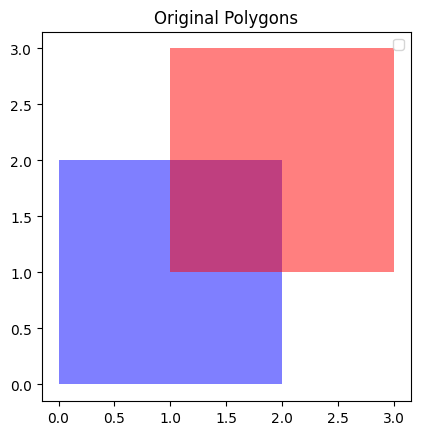

In [78]:
# Create two overlapping polygons
poly1 = Polygon([(0,0), (2,0), (2,2), (0,2)])
poly2 = Polygon([(1,1), (3,1), (3,3), (1,3)])

gdf1 = gpd.GeoDataFrame({'id_1': [1], 'data1': ['A'], 'geometry': [poly1]}, crs="EPSG:4326")
gdf2 = gpd.GeoDataFrame({'id_2': [2], 'data2': ['B'], 'geometry': [poly2]}, crs="EPSG:4326")

# Plot them
fig, ax = plt.subplots(1,1)
gdf1.plot(ax=ax, color='blue', alpha=0.5, label='GDF1')
gdf2.plot(ax=ax, color='red', alpha=0.5, label='GDF2')
ax.set_title("Original Polygons")
plt.legend()
plt.show()

### 8.1 Intersection

C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\1912967250.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\1912967250.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


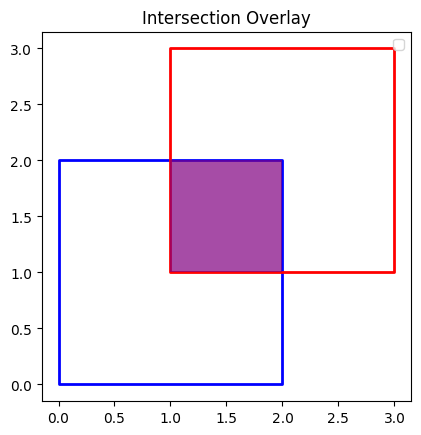

Intersection Attributes:
    id_1 data1  id_2 data2                             geometry
0     1     A     2     B  POLYGON ((2 2, 2 1, 1 1, 1 2, 2 2))


In [79]:
intersection_gdf = gpd.overlay(gdf1, gdf2, how='intersection')

fig, ax = plt.subplots(1,1)
gdf1.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2, label='GDF1 Outline')
gdf2.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label='GDF2 Outline')
intersection_gdf.plot(ax=ax, color='purple', alpha=0.7, label='Intersection')
ax.set_title("Intersection Overlay")
plt.legend()
plt.show()

print("Intersection Attributes:\n", intersection_gdf) # Attributes from both are carried over

### 8.2 Union

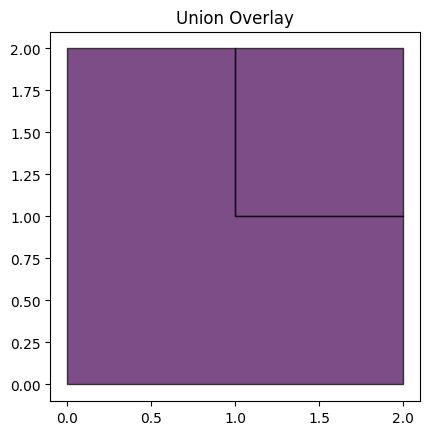

Union Attributes:
    id_1 data1  id_2 data2                                       geometry
0   1.0     A   2.0     B            POLYGON ((2 2, 2 1, 1 1, 1 2, 2 2))
1   1.0     A   NaN   NaN  POLYGON ((2 0, 0 0, 0 2, 1 2, 1 1, 2 1, 2 0))
2   NaN   NaN   2.0     B  POLYGON ((1 3, 3 3, 3 1, 2 1, 2 2, 1 2, 1 3))


In [80]:
union_gdf = gpd.overlay(gdf1, gdf2, how='union')

fig, ax = plt.subplots(1,1)
# gdf1.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2, label='GDF1 Outline')
# gdf2.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label='GDF2 Outline')
union_gdf.plot(ax=ax, cmap='viridis', alpha=0.7, edgecolor='black', column='id_1') # Color by original id
ax.set_title("Union Overlay")
plt.show()

print("Union Attributes:\n", union_gdf) # Geometries are split, attributes duplicated/NaN where applicable

### 8.3 Difference

C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\978044267.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\978044267.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


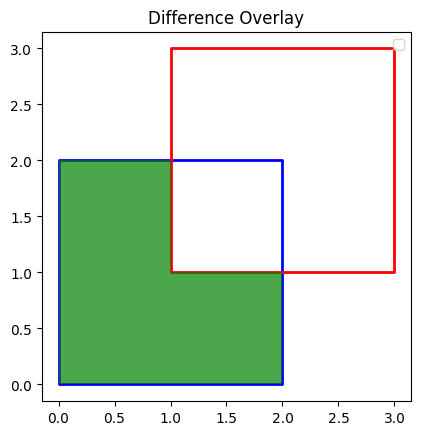

Difference Attributes:
    id_1 data1                                       geometry
0     1     A  POLYGON ((2 0, 0 0, 0 2, 1 2, 1 1, 2 1, 2 0))


In [81]:
# Difference: gdf1 - gdf2 (parts of gdf1 not in gdf2)
difference_gdf = gpd.overlay(gdf1, gdf2, how='difference')

fig, ax = plt.subplots(1,1)
gdf1.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2, label='GDF1 Outline')
gdf2.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2, label='GDF2 Outline')
difference_gdf.plot(ax=ax, color='green', alpha=0.7, label='Difference (GDF1 - GDF2)')
ax.set_title("Difference Overlay")
plt.legend()
plt.show()

print("Difference Attributes:\n", difference_gdf)

**Important for Overlay:**
*   Both `GeoDataFrames` **must** have the same CRS.
*   Overlay operations can be computationally intensive for large, complex datasets.

---

## 9. Advanced Plotting: Thematic Maps (Choropleth)

Choropleth maps use color intensity to represent the magnitude of an attribute for different areas.

We already saw a basic one: `world.plot(column='POP_EST', legend=True)`

Let's customize it:

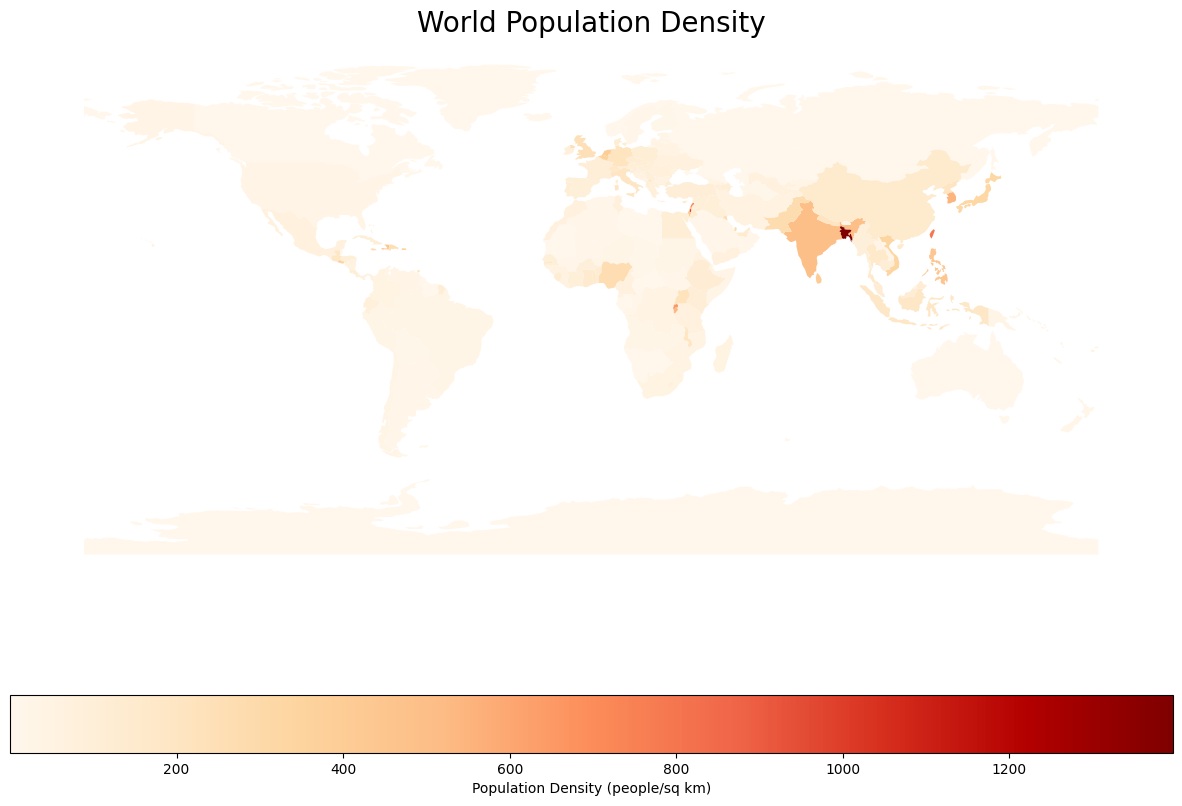

In [82]:
# Plotting population density we calculated earlier
# (using world_with_area which has 'pop_density')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_with_area.plot(column='pop_density',
                     ax=ax,
                     legend=True,
                     legend_kwds={'label': "Population Density (people/sq km)",
                                  'orientation': "horizontal"},
                     cmap='OrRd', # Color map (see Matplotlib cmaps)
                     missing_kwds={"color": "lightgrey", # Color for missing values
                                   "label": "Missing values"}
                    )
ax.set_title("World Population Density", fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.set_axis_off() # Turn off the axis lines and labels
plt.show()

### 9.1 Classification Schemes
Sometimes, raw values don't tell the best story. We can classify data into bins.
The `scheme` argument in `.plot()` helps with this (requires `mapclassify` library).
Common schemes:
*   `equal_interval`: Divides the range of data into equal-sized intervals.
*   `quantiles`: Divides data so each class has roughly the same number of features.
*   `natural_breaks` (or `fisher_jenks` or `jenkscaspall` variants): Seeks to minimize variance within classes and maximize variance between classes.

In [88]:
pip install -U mapclassify


     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.1 kB 1.3 MB/s eta 0:00:01
     -------------------------- ----------- 41.0/59.1 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 444.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     - -------------------------------------- 0.1/1.7 MB 1.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.2/1.7 MB 2.6 MB/s eta 0:00:01
     ----- ---------------------------------- 0.3/1.7 MB 2.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.4/1.7 MB 2.2 MB/s eta 0:00:01
     ---------- ----------------------------- 0.5/1.7 MB 2.3 MB/s eta 0:00:01
     ---------- ----------------------------- 0.5/1.7 MB 2.3 MB/s eta 0:00:01
     -------------- ------------------------- 0.6/1.7 MB 2.2 MB/s eta 0:00:01
     ---------------- ----------------------- 0.7/1.7 MB 2.4 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


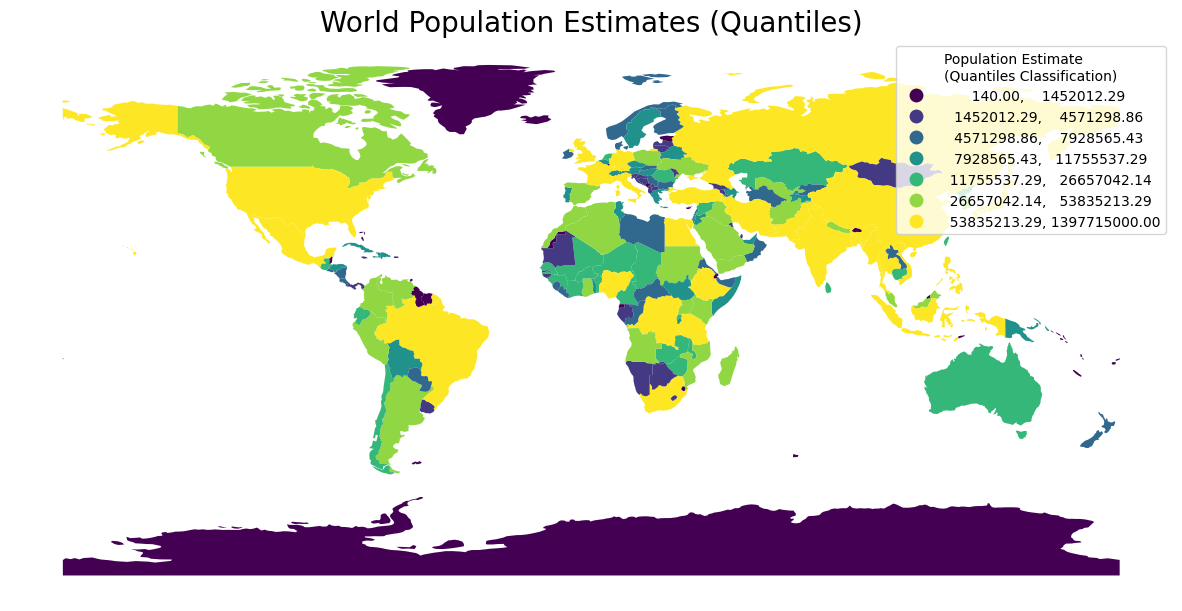

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_with_area.plot(column='POP_EST',
                     ax=ax,
                     legend=True,
                     scheme='quantiles', # Using quantiles classification
                     k=7, # Number of classes
                     cmap='viridis',
                     legend_kwds={'title': "Population Estimate\n(Quantiles Classification)"}
                    )
ax.set_title("World Population Estimates (Quantiles)", fontdict={'fontsize': '20', 'fontweight' : '3'})
ax.set_axis_off()
plt.show()

### 9.2 Adding Basemaps (Optional - requires `contextily`)
For more context, you can add web map tiles as a basemap.
This requires the `contextily` library: `pip install contextily`

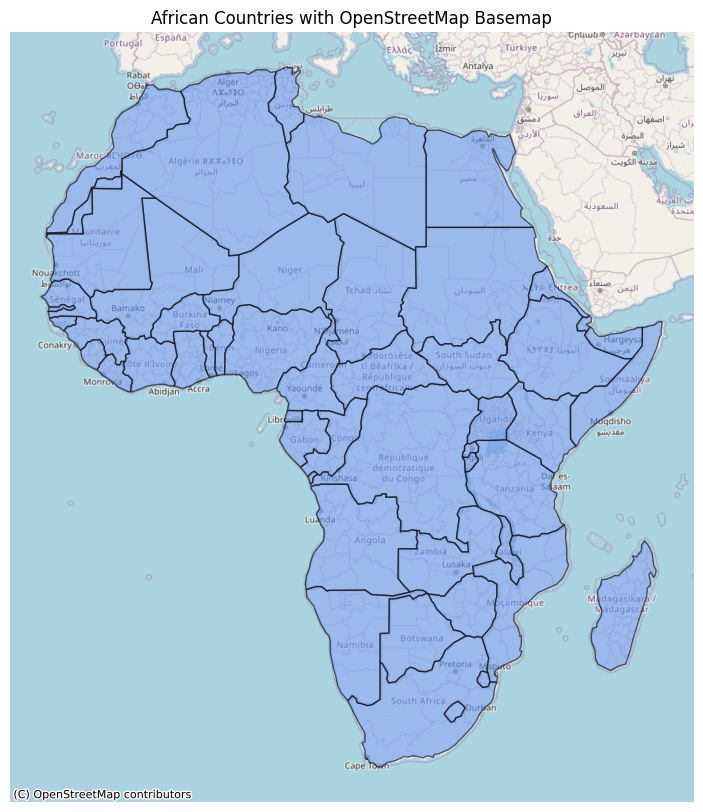

Contextily example commented out. Install 'contextily' and uncomment to run.


In [87]:
# This is an advanced topic, so we'll just show a conceptual example.
# Basemaps usually work best with data in Web Mercator (EPSG:3857).

import contextily as ctx # Uncomment if contextily is installed

africa_mercator = africa.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
africa_mercator.plot(ax=ax, alpha=0.6, edgecolor='k', facecolor='cornflowerblue')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik) # Or other providers
ax.set_axis_off()
ax.set_title("African Countries with OpenStreetMap Basemap")
plt.show()
print("Contextily example commented out. Install 'contextily' and uncomment to run.")

---

## 10. Putting It All Together: A Mini Case Study

**Goal:** Find and plot all national parks within a 200km radius of major cities in a specific country (e.g., USA).

*Unfortunately, `geopandas.datasets` doesn't have national parks data. We'll adapt this to something feasible with available data.*

**Adapted Goal:** Identify countries that host selected major capital cities, then plot these countries and their respective capital cities.

**Steps:**
1.  Load `world` and `cities` datasets (already done).
2.  Ensure CRS match (they do: EPSG:4326).
3.  Select a list of major capital cities.
4.  Use the `cities_with_country_info` GeoDataFrame (from our spatial join earlier) which already links cities to countries.
5.  Filter this joined data for our selected capital cities.
6.  Identify the unique countries that host these selected capitals.
7.  Plot these countries and highlight the selected capital cities.

In [108]:
one = cities_with_country_info[cities_with_country_info['NAME_EN']=='Singapore']

for c in one.columns:
    print(f"{c}: {one[c].values[0]}")

SCALERANK: 0
NATSCALE: 600
LABELRANK: 0
FEATURECLA: Admin-0 capital
NAME_left: Singapore
NAMEPAR: None
NAMEALT: None
NAMEASCII: Singapore
ADM0CAP: 1
CAPIN: None
WORLDCITY: 1
MEGACITY: 1
SOV0NAME: Singapore
SOV_A3: SGP
ADM0NAME: Singapore
ADM0_A3: SGP
ADM1NAME: None
ISO_A2: SG
NOTE: None
LATITUDE: 1.294979
LONGITUDE: 103.853875
POP_MAX: 5183700
POP_MIN: 3289529
POP_OTHER: 3314179.0
RANK_MAX: 13
RANK_MIN: 12
MEGANAME: Singapore
LS_NAME: Singapore
MAX_POP10: 3289529.0
MAX_POP20: 4207001.0
MAX_POP50: 4207001.0
MAX_POP300: 4207001.0
MAX_POP310: 4207001.0
MAX_NATSCA: 300.0
MIN_AREAKM: 305.0
MAX_AREAKM: 456.0
MIN_AREAMI: 118.0
MAX_AREAMI: 176.0
MIN_PERKM: 173.0
MAX_PERKM: 288.0
MIN_PERMI: 108.0
MAX_PERMI: 179.0
MIN_BBXMIN: 103.633333
MAX_BBXMIN: 103.658333
MIN_BBXMAX: 104.0
MAX_BBXMAX: 104.0
MIN_BBYMIN: 1.25
MAX_BBYMIN: 1.25
MIN_BBYMAX: 1.425
MAX_BBYMAX: 1.475
MEAN_BBXC: 103.821508
MEAN_BBYC: 1.352586
TIMEZONE: Asia/Singapore
UN_FID: 450.0
POP1950: 1016.0
POP1955: 1306.0
POP1960: 1634.0
POP19

In [104]:
for c in target_capitals_df.columns:
    print(f"Column: {c}, Type: {target_capitals_df[c].dtype}")

Column: SCALERANK, Type: int32
Column: NATSCALE, Type: int32
Column: LABELRANK, Type: int32
Column: FEATURECLA, Type: object
Column: NAME_left, Type: object
Column: NAMEPAR, Type: object
Column: NAMEALT, Type: object
Column: NAMEASCII, Type: object
Column: ADM0CAP, Type: int32
Column: CAPIN, Type: object
Column: WORLDCITY, Type: int32
Column: MEGACITY, Type: int32
Column: SOV0NAME, Type: object
Column: SOV_A3, Type: object
Column: ADM0NAME, Type: object
Column: ADM0_A3, Type: object
Column: ADM1NAME, Type: object
Column: ISO_A2, Type: object
Column: NOTE, Type: object
Column: LATITUDE, Type: float64
Column: LONGITUDE, Type: float64
Column: POP_MAX, Type: int64
Column: POP_MIN, Type: int64
Column: POP_OTHER, Type: float64
Column: RANK_MAX, Type: int32
Column: RANK_MIN, Type: int32
Column: MEGANAME, Type: object
Column: LS_NAME, Type: object
Column: MAX_POP10, Type: float64
Column: MAX_POP20, Type: float64
Column: MAX_POP50, Type: float64
Column: MAX_POP300, Type: float64
Column: MAX_POP

C:\Users\wasif\AppData\Local\Temp\ipykernel_17912\375580362.py:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


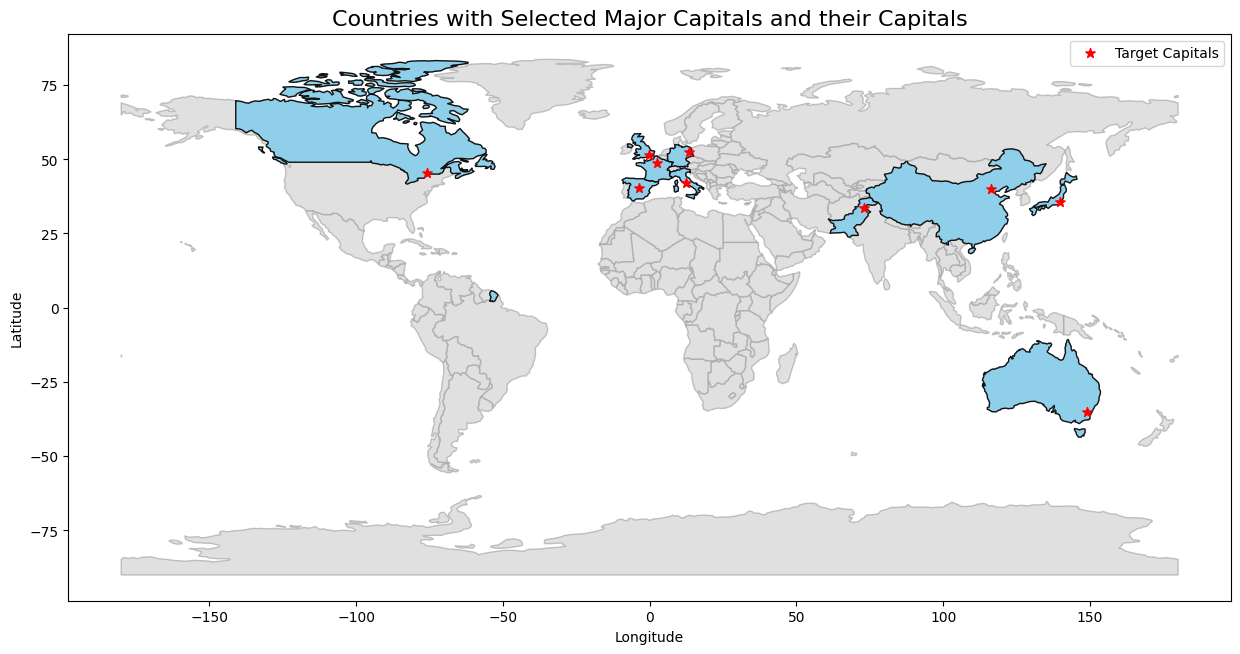

Target capitals plotted: ['Islamabad', 'Ottawa', 'Canberra', 'Madrid', 'Berlin', 'London', 'Rome', 'Beijing', 'Tokyo', 'Paris']
Countries containing these capitals: ['Canada', 'France', 'Pakistan', 'Germany', 'Spain', 'Australia', "People's Republic of China", 'Italy', 'United Kingdom', 'Japan']


In [112]:
# 1. Data is already loaded as 'world', 'cities', and 'cities_with_country_info'

# 2. CRS match confirmed earlier.

# 3. Select a list of major capital cities for demonstration
selected_capital_names = [
    'Paris', 'Berlin', 'London', 'Madrid', 'Rome', 
    'Washington, D.C.', 'Ottawa', 'Canberra', 'Beijing', 'Tokyo', 'Islamabad',
]

# 4. Use 'cities_with_country_info'
# This DataFrame already has city_name and country_name (or similar from the sjoin)

# 5. Filter for our selected capital cities
# Recall we renamed 'name_left' to 'city_name' and 'name_right' to 'country_name'
target_capitals_df = cities_with_country_info[cities_with_country_info['NAME_EN'].isin(selected_capital_names)]

# Remove duplicate cities if any (e.g. if a city was near a border and got multiple hits in a less precise sjoin, though 'within' is usually specific)
target_capitals_df = target_capitals_df.drop_duplicates(subset=['NAME_EN'])

# 6. Identify unique countries that host these capitals
# The 'country_name' column in 'target_capitals_df' holds the country names
host_country_names = target_capitals_df['NAME_right'].unique()
countries_hosting_target_capitals = world[world['NAME'].isin(host_country_names)]

# 7. Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot all world countries lightly for context
world.plot(ax=ax, edgecolor='darkgray', color='lightgray', alpha=0.7, zorder=1)

# Plot the identified host countries more prominently
if not countries_hosting_target_capitals.empty:
    countries_hosting_target_capitals.plot(ax=ax, edgecolor='black', color='skyblue', alpha=0.9, label='Countries with Target Capitals', zorder=2)
else:
    print("No countries found hosting the target capitals. Check city names and join results.")

# Plot the target capital cities
if not target_capitals_df.empty:
    target_capitals_df.plot(ax=ax, color='red', markersize=50, label='Target Capitals', zorder=3, marker='*')
else:
    print("No target capitals found. Check city names.")


ax.set_title("Countries with Selected Major Capitals and their Capitals", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Create legend handles manually if needed, or rely on plot labels
handles, labels = ax.get_legend_handles_labels()
if handles: # Only show legend if there's something to label
    ax.legend(handles=handles, labels=labels)
    
plt.show()

if not target_capitals_df.empty:
    print(f"Target capitals plotted: {target_capitals_df['NAME_EN'].tolist()}")
if not countries_hosting_target_capitals.empty:
    print(f"Countries containing these capitals: {countries_hosting_target_capitals['NAME_EN'].tolist()}")

---

---